In [1]:
import pandas as pd 

In [210]:
import plotly.express as px

In [324]:
import plotly.io as pio

In [ ]:
import country_converter as coco

In [205]:
df = pd.read_csv('https://query.data.world/s/vcepkrwtvpci6neayomihcirjeq3ay', engine='python', encoding='unicode_escape')

In [293]:
def supply_demand(df, country):
    x = df[df.Country==country].groupby(["Pregnancy intention","Contraceptive availability"]).sum()
    x.loc[:,"supply"] = x.loc["Wanting to avoid pregnancy"].unstack().values[0]
    x.loc[:,"demand"] = 1-x.loc["Not wanting to avoid pregancy"].unstack().values[0]
    x.loc[:,"deficit"] = x.demand-x.supply
    x.loc[:,"country"] = country
    return x

In [295]:
def tidy(df):
    tidy = pd.concat([supply_demand(df=df,country=country) for country in df.Country.unique().tolist()])
    tidy.reset_index(inplace=True)
    tidy.drop(tidy.columns[0:3], axis=1, inplace=True)
    tidy.drop_duplicates(inplace=True)
    return tidy

In [296]:
tidy = tidy(df)

In [297]:
tidy.loc[:,"codes"] = coco.convert(names=tidy.country.tolist(), to='ISO3')

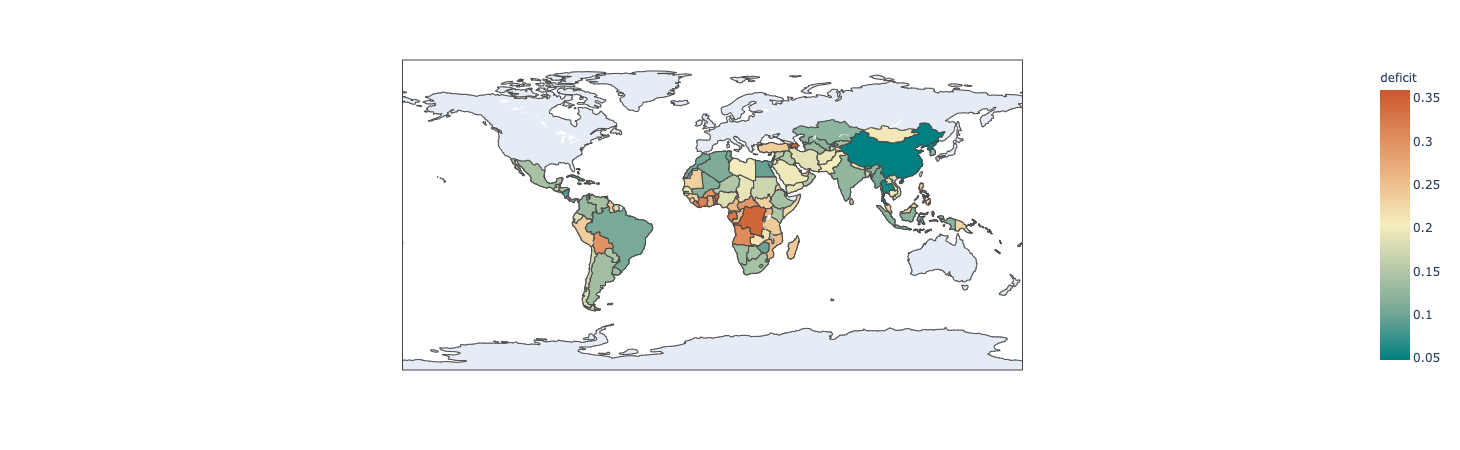

In [298]:
fig = px.choropleth(tidy, locations="codes",
                    color="deficit", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.Geyser)
fig.show()

### top 10 countries with most contraception deficit

In [299]:
tidy.sort_values("deficit", ascending=False).country.head(10)

375                 Trinidad and Tobago
96                                Benin
69     Democratic Republic of the Congo
261                          Azerbaijan
75                                Gabon
120                             Liberia
105                       Côte d'Ivoire
78                Sao Tome and Principe
141                                Togo
54                               Angola
Name: country, dtype: object

### top 10 countries with least contraception deficit

In [300]:
tidy.sort_values("deficit", ascending=True).country.head(10)

165                China
174          North Korea
171                Macau
249             Thailand
399            Nicaragua
168    Hong Kong (China)
204               Bhutan
291                Qatar
348                 Cuba
147                Egypt
Name: country, dtype: object

## supply and demand plot

In [328]:
fig = px.scatter(tidy, x="supply", y="demand", color="deficit", hover_name="country", hover_data={
#    "supply":False,
#    "demand":False,
#    "deficit":False
}, color_continuous_scale=px.colors.diverging.Geyser)

fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False, plot_bgcolor="white")
fig.update_xaxes(range=[0, 1])
fig.update_yaxes(range=[0, 1])

fig.show(renderer='iframe')

## Find your country! (some selection widget, or by hovering)

### and link the plots...

In [329]:
!jupyter nbconvert --to html mmv34.ipynb --no-input

[NbConvertApp] Converting notebook mmv34.ipynb to html
[NbConvertApp] Writing 291904 bytes to mmv34.html
